In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math



%matplotlib inline


In [3]:
df = pd.read_csv('train.csv')
df_otest = pd.read_csv('test.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


---
## Data validation


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Let's impute missing values and correct the column datattypes:

In [6]:
df['Item_Identifier_text'] = df['Item_Identifier'].str.slice(0, 3).astype('category')
df['Item_Identifier_num'] =  df['Item_Identifier'].str.slice(3,5).astype('category')

In [7]:
df.drop(['Item_Identifier'],axis=1, inplace=True)

We have total 1559 items.

---

In [8]:
df['Outlet_Identifier'].nunique()

10

In [9]:
# df['Item_Visibility'] = df['Item_Visibility']*100
# !pip install impyute

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Weight                7060 non-null   float64 
 1   Item_Fat_Content           8523 non-null   object  
 2   Item_Visibility            8523 non-null   float64 
 3   Item_Type                  8523 non-null   object  
 4   Item_MRP                   8523 non-null   float64 
 5   Outlet_Identifier          8523 non-null   object  
 6   Outlet_Establishment_Year  8523 non-null   int64   
 7   Outlet_Size                6113 non-null   object  
 8   Outlet_Location_Type       8523 non-null   object  
 9   Outlet_Type                8523 non-null   object  
 10  Item_Outlet_Sales          8523 non-null   float64 
 11  Item_Identifier_text       8523 non-null   category
 12  Item_Identifier_num        8523 non-null   category
dtypes: category(2), float64(4), int64

In [11]:
from impyute.imputation.cs import mice

#Multivariate Imputation by Chained Equations
# start the MICE training
imputed_training=mice(df[['Item_Weight','Item_Visibility','Outlet_Establishment_Year','Item_MRP','Item_Outlet_Sales']].values)

In [12]:
imputed_training = pd.DataFrame(imputed_training, columns =['Item_Weight','Item_Visibility','Outlet_Establishment_Year','Item_MRP','Item_Outlet_Sales'])

In [13]:
imputed_training['Item_Weight'].nunique()

1878

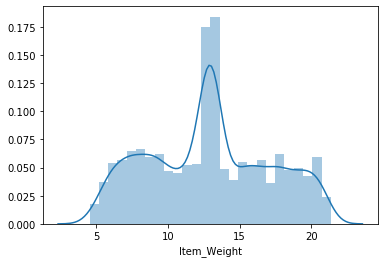

In [14]:
sns.distplot(imputed_training['Item_Weight'])

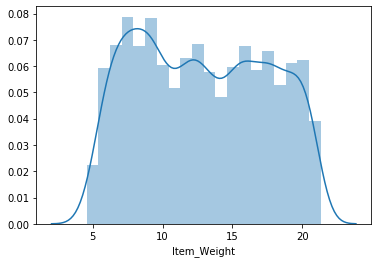

In [15]:
sns.distplot(df['Item_Weight'])

In [16]:
df['Item_Weight']= imputed_training['Item_Weight']
df['Item_Weight'].shape

(8523,)

In [17]:
df['Item_Weight'].isnull().sum()

0

In [18]:
# filling NaN values in the column with mean: 

# df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [19]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [20]:
a= {'Low Fat':'Low','Regular':'Regular', 'LF':'Low', 'low fat':'Low', 'reg':'Regular'}
df['Item_Fat_Content'] =df['Item_Fat_Content'].map(a)

In [21]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].astype('category')

In [22]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [23]:
c= {'Fruits and Vegetables': 'Fruits-Vegy','Snack Foods':'Snacks','Household':'Household','Frozen Foods':'Frozen','Dairy':'Dairy', 'Canned':'Frozen','Soft Drinks':'Soft Drinks','Baking Goods':'Baked','Health and Hygiene':'Household','Meat': 'Non-veg', 'Breads':'Baked', 'Hard Drinks':'Alcohol','Others':'Household','Starchy Foods':'Snacks', 'Breakfast':'Breakfast', 'Seafood':'Non-veg'}


In [24]:
c.values()

dict_values(['Fruits-Vegy', 'Snacks', 'Household', 'Frozen', 'Dairy', 'Frozen', 'Soft Drinks', 'Baked', 'Household', 'Non-veg', 'Baked', 'Alcohol', 'Household', 'Snacks', 'Breakfast', 'Non-veg'])

In [25]:
df['Item_Type'] = df['Item_Type'].map(c)

In [26]:
df['Item_Type']= df['Item_Type'].astype('category')

In [27]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [28]:
df['Outlet_Identifier'] = df['Outlet_Identifier'].astype('category')

In [29]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [30]:
df['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [31]:
df[df['Outlet_Size'].isnull()==True]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_text,Item_Identifier_num
3,19.200,Regular,0.000000,Fruits-Vegy,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FDX,07
8,16.200,Regular,0.016687,Frozen,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,FDH,17
9,19.200,Regular,0.094450,Frozen,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,FDU,28
25,13.000,Low,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,NCD,06
28,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,FDE,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8502,8.420,Low,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688,NCH,43
8508,11.350,Regular,0.043246,Fruits-Vegy,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646,FDW,31
8509,8.100,Low,0.214306,Fruits-Vegy,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804,FDG,45
8514,15.000,Regular,0.054489,Frozen,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232,FDA,01


In [32]:
#filling NaN values with 'no info' :
df['Outlet_Size'].fillna('Medium', inplace=True)

In [33]:
df['Outlet_Size']=df['Outlet_Size'].astype('category')
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [34]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [35]:
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].astype('category')

In [36]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [37]:
df['Outlet_Type']=df['Outlet_Type'].astype('category')

In [38]:
df['Item_Outlet_Sales'].isnull().sum()

0

In [39]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Identifier_text         0
Item_Identifier_num          0
dtype: int64

In [40]:
print(df['Outlet_Size'].value_counts())


Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [41]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_text,Item_Identifier_num
0,9.30,Low,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA,15
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC,01
2,17.50,Low,0.016760,Non-veg,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN,15
3,19.20,Regular,0.000000,Fruits-Vegy,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FDX,07
4,8.93,Low,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NCD,19


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Weight                8523 non-null   float64 
 1   Item_Fat_Content           8523 non-null   category
 2   Item_Visibility            8523 non-null   float64 
 3   Item_Type                  8523 non-null   category
 4   Item_MRP                   8523 non-null   float64 
 5   Outlet_Identifier          8523 non-null   category
 6   Outlet_Establishment_Year  8523 non-null   int64   
 7   Outlet_Size                8523 non-null   category
 8   Outlet_Location_Type       8523 non-null   category
 9   Outlet_Type                8523 non-null   category
 10  Item_Outlet_Sales          8523 non-null   float64 
 11  Item_Identifier_text       8523 non-null   category
 12  Item_Identifier_num        8523 non-null   category
dtypes: category(8), float64(4), int64

---
#### UVA
---

In [94]:
# # Let's define the function for plotting  categorical values:

def plot_cat1(var,l=8,b=5):
    plt.figure(figsize =(l,b))
    sns.countplot(df[var], order = df[var].value_counts().index)


In [96]:
def plot_cat(var,l=7,b=5):

    # size = len(var)
    plt.figure(figsize = (l,b), dpi = 100)

    norm_count = df[var].value_counts(normalize = True)
    n_uni = df[var].nunique()
    #Plotting the variable with every information
    # plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 10)
    plt.ylabel('{}'.format(var), fontsize = 10)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

In [44]:
# function for plotting numerical 
def plot_cont(var,l=8,b=5):
    plt.figure(figsize=(l,b))
    sns.distplot(df[var])
    plt.xlabel(var)

In [45]:
# plot kde plot with median and Std values
def plot_cont_kde(var,l=8,b=5):
    mini = df[var].min()
    maxi = df[var].max()
    ran = df[var].max()-df[var].min()
    mean = df[var].mean()
    skew = df[var].skew()
    kurt = df[var].kurtosis()
    median = df[var].median()
    st_dev = df[var].std()
    points = mean-st_dev, mean+st_dev
    
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=var,ax=axes[0])
    sns.distplot(a=df[var],ax=axes[1],color='#ff4125')
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    
    fig.set_size_inches(l,b)
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),round(kurt,2),round(skew,2),(round(mini,2),round(maxi,2),round(ran,2)),round(mean,2),round(median,2)))

In [47]:
#  df.select_dtypes(dtype == '')

In [48]:
# plot_cat('Item_Identifier')

In [49]:
# plot_cat('Item')

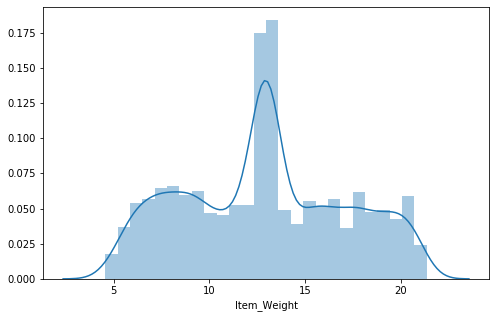

In [50]:
plot_cont('Item_Weight')

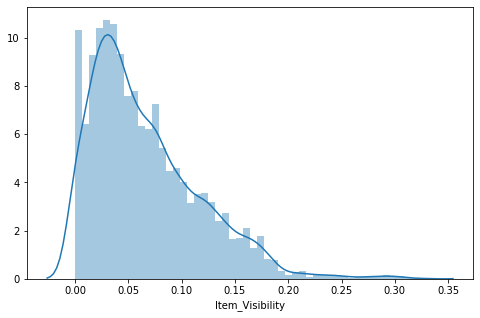

In [51]:
plot_cont('Item_Visibility')

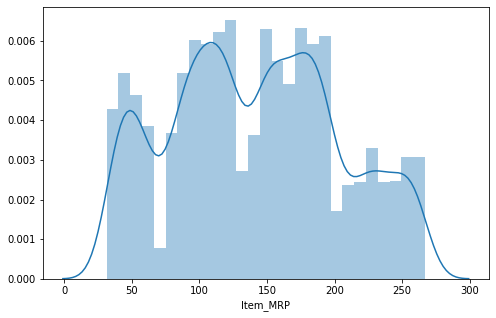

In [52]:
plot_cont('Item_MRP')

In [60]:
abc = np.log(df['Item_MRP'])

In [61]:
pd.DataFrame(abc)

,Item_MRP
0,5.520697
1,3.876794
2,4.953133
3,5.204529
4,3.986414
...,...
8518,5.368411
8519,4.683584
8520,4.444090
8521,4.636021


In [64]:
abc.shape

(8523,)

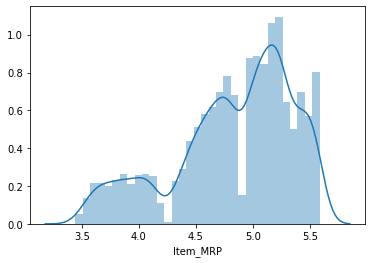

In [67]:
sns.distplot(abc)

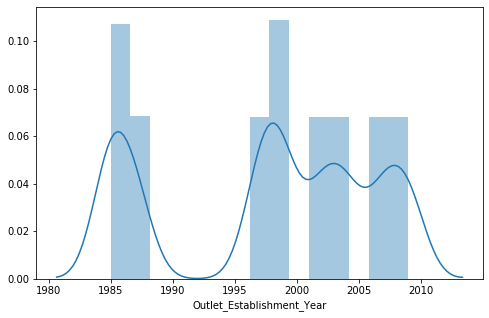

In [56]:
plot_cont('Outlet_Establishment_Year')

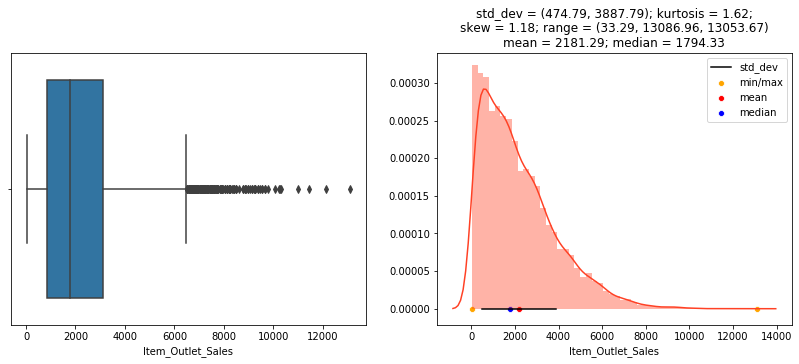

In [57]:
plot_cont_kde('Item_Outlet_Sales',14,5)

In [58]:
# Right skewed data

### Categorical data

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Weight                8523 non-null   float64 
 1   Item_Fat_Content           8523 non-null   category
 2   Item_Visibility            8523 non-null   float64 
 3   Item_Type                  8523 non-null   category
 4   Item_MRP                   8523 non-null   float64 
 5   Outlet_Identifier          8523 non-null   category
 6   Outlet_Establishment_Year  8523 non-null   int64   
 7   Outlet_Size                8523 non-null   category
 8   Outlet_Location_Type       8523 non-null   category
 9   Outlet_Type                8523 non-null   category
 10  Item_Outlet_Sales          8523 non-null   float64 
 11  Item_Identifier_text       8523 non-null   category
 12  Item_Identifier_num        8523 non-null   category
dtypes: category(8), float64(4), int64

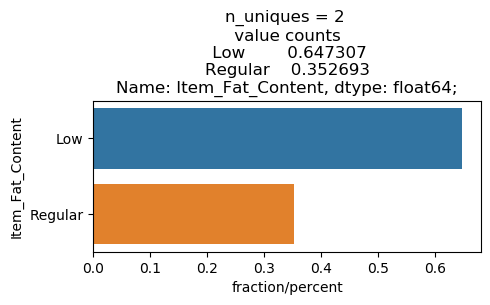

In [97]:
plot_cat('Item_Fat_Content',5,2)

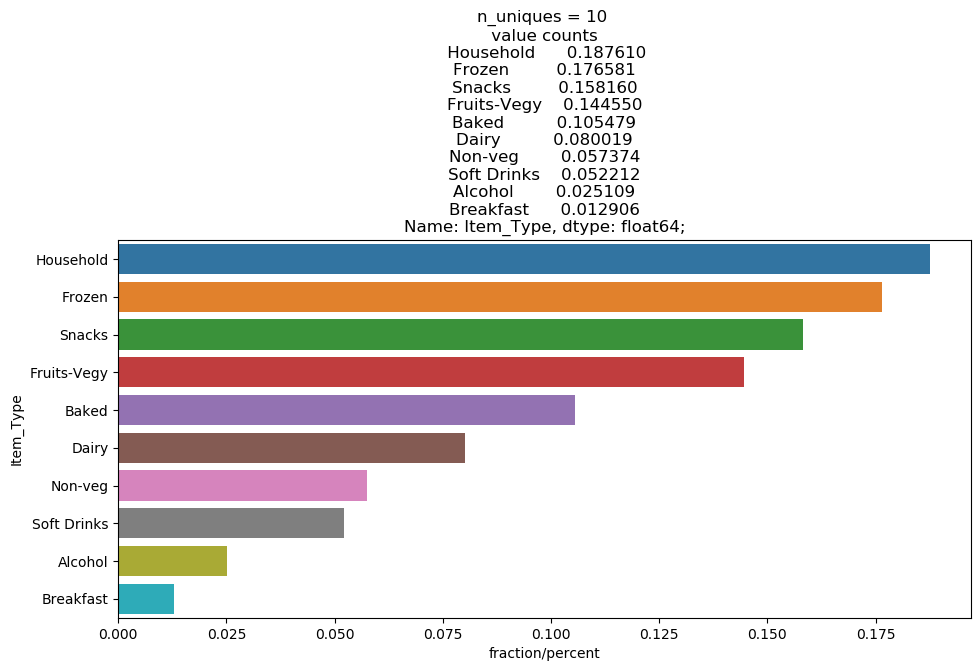

In [98]:
plot_cat('Item_Type',11,5)

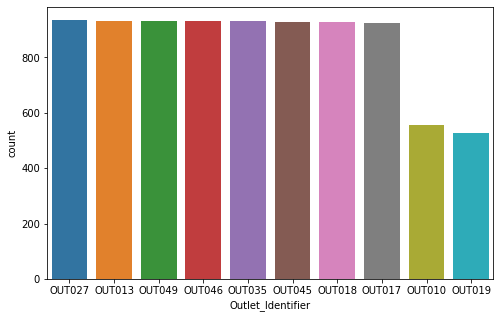

In [101]:
plot_cat1('Outlet_Identifier')

In [ ]:
#Count for all outlet seems same except - OUT010, OUT019, 

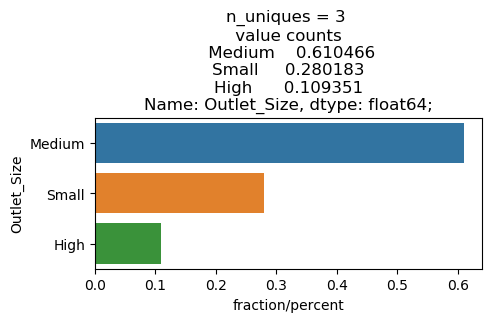

In [102]:
plot_cat('Outlet_Size',5,2)

In [ ]:
# We have maximum medium and small sized outlets.

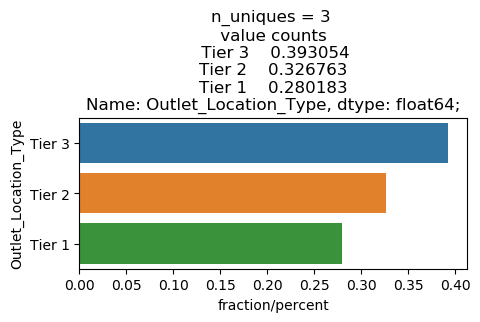

In [103]:
plot_cat('Outlet_Location_Type',5,2)

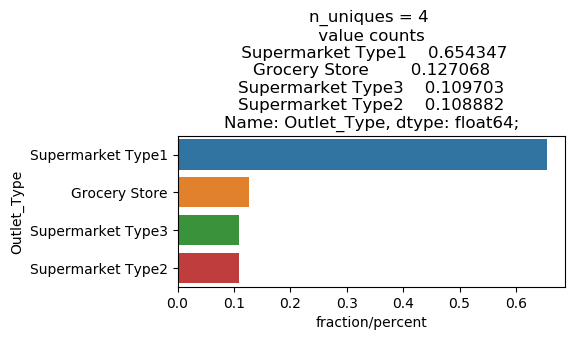

In [104]:
plot_cat('Outlet_Type',5,2)

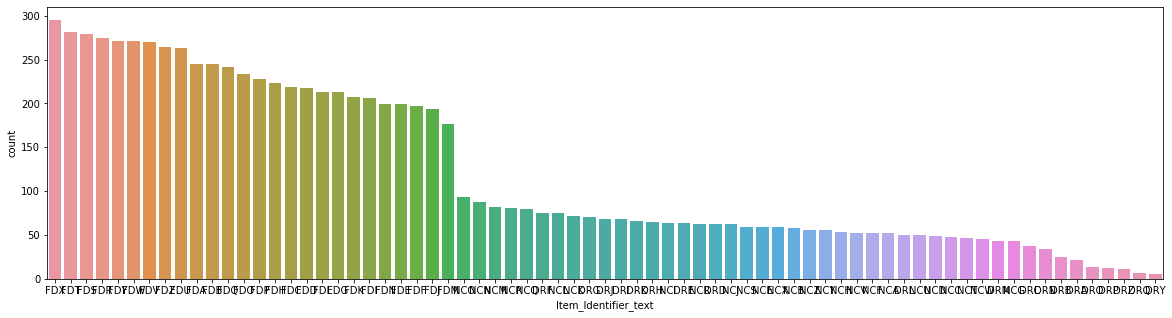

In [105]:
plot_cat1('Item_Identifier_text',20,5)

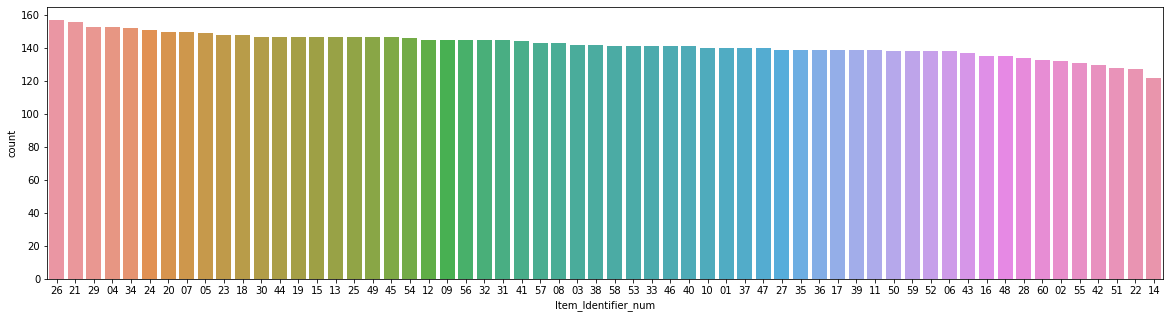

In [106]:
plot_cat1('Item_Identifier_num',20,5)

---
## Inferences from UVA:
    . Maximum type of outlets are - Supermarket type 1
    . Tier 3 has max stores
    . Medium sized outlets are max in size
    . Low fat content type is more in number
    
---

In [108]:
## Checking for outliers:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Weight                8523 non-null   float64 
 1   Item_Fat_Content           8523 non-null   category
 2   Item_Visibility            8523 non-null   float64 
 3   Item_Type                  8523 non-null   category
 4   Item_MRP                   8523 non-null   float64 
 5   Outlet_Identifier          8523 non-null   category
 6   Outlet_Establishment_Year  8523 non-null   int64   
 7   Outlet_Size                8523 non-null   category
 8   Outlet_Location_Type       8523 non-null   category
 9   Outlet_Type                8523 non-null   category
 10  Item_Outlet_Sales          8523 non-null   float64 
 11  Item_Identifier_text       8523 non-null   category
 12  Item_Identifier_num        8523 non-null   category
dtypes: category(8), float64(4), int64

In [112]:
# cat_group = ['Item_Fat_Content','Item_Type',]
cont_group = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']

In [110]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True
True


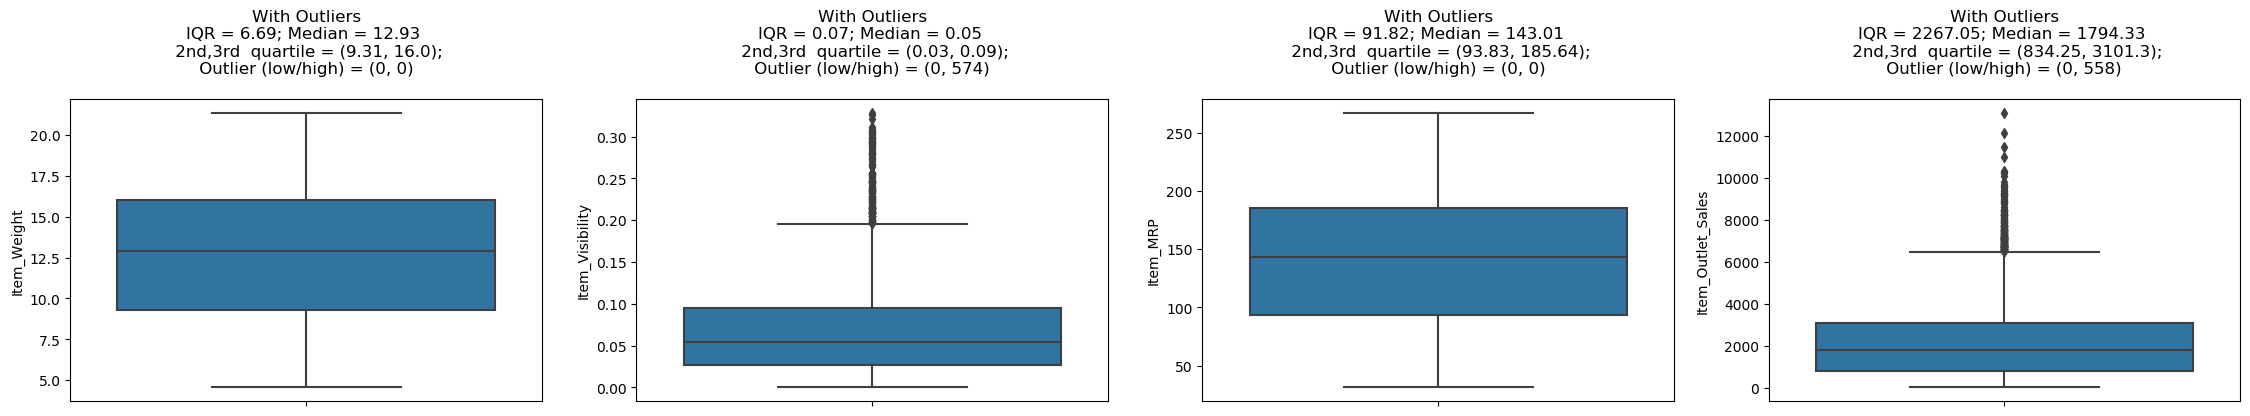

In [113]:
UVA_outlier(df,cont_group)

## BVA

### cont-cont

In [114]:

numerical = df.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [115]:
correlation = numerical.dropna().corr()
correlation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014857,0.029493,-0.014534,0.014684
Item_Visibility,-0.014857,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.029493,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.014534,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014684,-0.128625,0.567574,-0.049135,1.000000


### BVA

In [59]:
df.groupby(by =['Outlet_Type','Outlet_Size'])[ 'Item_Type','Outlet_Location_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Identifier_num'].mean()

Item_MRP  Outlet_Establishment_Year  \
Outlet_Type       Outlet_Size                                          
Grocery Store     High                NaN                        NaN   
                  Medium       140.777594                1998.000000   
                  Small        139.787088                1985.000000   
Supermarket Type1 High         141.425982                1987.000000   
                  Medium       140.223912                2002.660682   
                  Small        142.589934                2000.500000   
Supermarket Type2 High                NaN                        NaN   
                  Medium       141.678634                2009.000000   
                  Small               NaN                        NaN   
Supermarket Type3 High                NaN                        NaN   
                  Medium       139.801791                1985.000000   
                  Small               NaN                        NaN   

                               Item_Outlet_Sales  
Outlet_Type       Outlet_Size                     
Grocery Store     High                       NaN  
                  Medium              339.351662  
                  Small               340.329723  
Supermarket Type1 High               2298.995256  
                  Medium             2293.773997  
                  Small              2358.343066  
Supermarket Type2 High                       NaN  
                  Medium             1995.498739  
                  Small                      NaN  
Supermarket Type3 High                       NaN  
                  Medium             3694.038558  
                  Small                      NaN